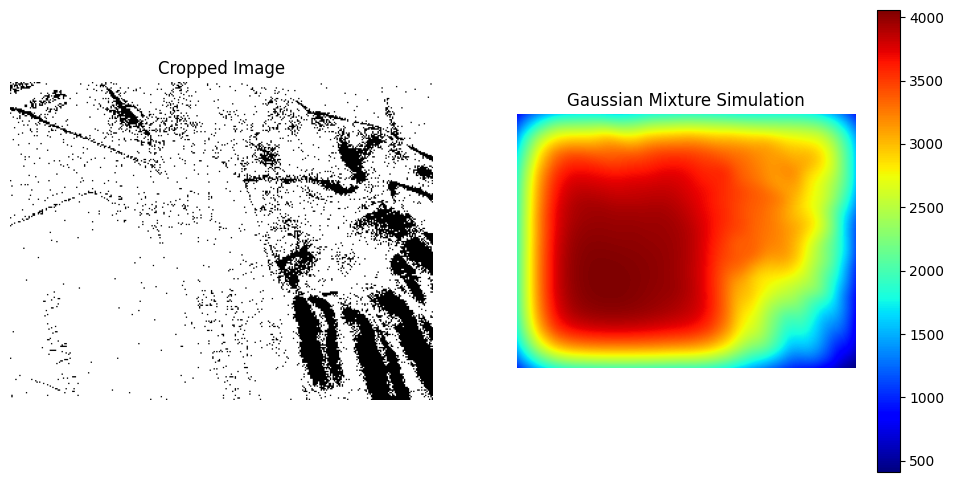

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Photometric Gaussian function
def photometric_gaussian(u_g, u, v, I_u, lambda_g):
    diff_u = u_g[0] - u
    diff_v = u_g[1] - v
    return np.exp(-(diff_u**2 + diff_v**2) / (2 * (lambda_g * I_u)**2))

# Gaussian mixture function
def gaussian_mixture(u_g, image, lambda_g):
    u, v = np.indices(image.shape)
    I_u = image[u, v]
    mask = I_u > 0  # Ignore black pixels
    g_values = photometric_gaussian(u_g, u[mask], v[mask], I_u[mask], lambda_g)
    return np.sum(g_values)

# Function to simulate Gaussian mixture for the entire image
def simulate_gaussian_mixture(image, lambda_g):
    height, width = image.shape
    G_mixture = np.zeros((height, width))
    
    for u in range(height):
        for v in range(width):
            u_g = (u, v)
            G_mixture[u, v] = gaussian_mixture(u_g, image, lambda_g)
    
    return G_mixture

# Load and crop the image
image_path = './test.png'
image = Image.open(image_path).convert('L')
image = np.array(image)

# Crop the image to the specified region
cropped_image = image[0:240, 0:320]

# Define lambda_g
lambda_g = 0.1  # Adjust this value as needed

# Simulate Gaussian mixture
result = simulate_gaussian_mixture(cropped_image, lambda_g)

# Visualize the cropped image and the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title('Cropped Image')
ax[0].axis('off')

ax[1].imshow(result, cmap='jet')
ax[1].set_title('Gaussian Mixture Simulation')
ax[1].axis('off')

plt.colorbar(ax[1].imshow(result, cmap='jet'), ax=ax[1], orientation='vertical')
plt.show()

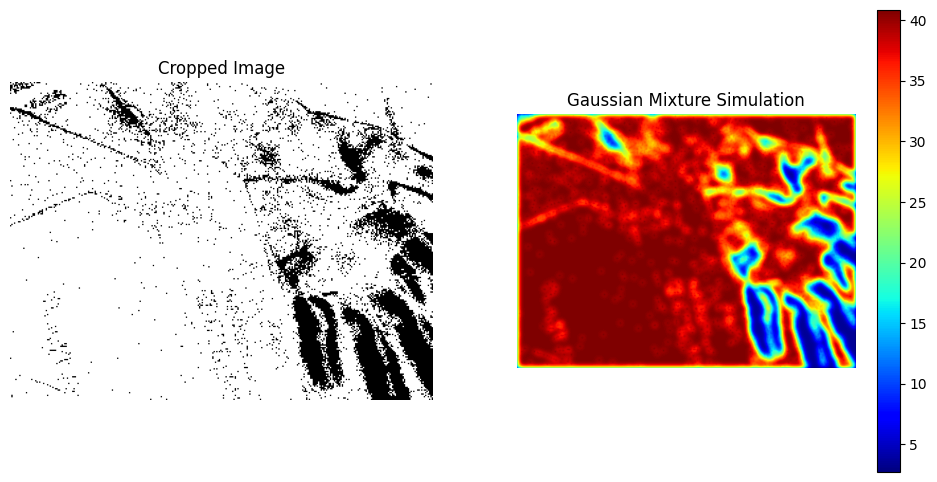

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Photometric Gaussian function
def photometric_gaussian(u_g, u, v, I_u, lambda_g):
    diff_u = u_g[0] - u
    diff_v = u_g[1] - v
    return np.exp(-(diff_u**2 + diff_v**2) / (2 * (lambda_g * I_u)**2))

# Gaussian mixture function
def gaussian_mixture(u_g, image, lambda_g):
    u, v = np.indices(image.shape)
    I_u = image[u, v]
    mask = I_u > 0  # Ignore black pixels
    g_values = photometric_gaussian(u_g, u[mask], v[mask], I_u[mask], lambda_g)
    return np.sum(g_values)

# Function to simulate Gaussian mixture for the entire image
def simulate_gaussian_mixture(image, lambda_g):
    height, width = image.shape
    G_mixture = np.zeros((height, width))
    
    for u in range(height):
        for v in range(width):
            u_g = (u, v)
            G_mixture[u, v] = gaussian_mixture(u_g, image, lambda_g)
    
    return G_mixture

# Load and crop the image
image_path = './test.png'
image = Image.open(image_path).convert('L')
image = np.array(image)

# Crop the image to the specified region
cropped_image = image[0:240, 0:320]

# Define lambda_g
lambda_g = 0.01  # Adjust this value as needed

# Simulate Gaussian mixture
result = simulate_gaussian_mixture(cropped_image, lambda_g)

# Visualize the cropped image and the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title('Cropped Image')
ax[0].axis('off')

ax[1].imshow(result, cmap='jet')
ax[1].set_title('Gaussian Mixture Simulation')
ax[1].axis('off')

plt.colorbar(ax[1].imshow(result, cmap='jet'), ax=ax[1], orientation='vertical')
plt.show()